In [ ]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data_set.csv to data_set.csv


In [ ]:
df = pd.read_csv('data_set.csv')

df.head()

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


In [ ]:
print("Visão geral do dataset:")
print(df.info())

Visão geral do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41762 entries, 0 to 41761
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VDRL_RESULT        41762 non-null  float64
 1   CONS_ALCOHOL       41762 non-null  float64
 2   RH_FACTOR          41762 non-null  float64
 3   SMOKER             41762 non-null  float64
 4   PLAN_PREGNANCY     41762 non-null  float64
 5   BLOOD_GROUP        41762 non-null  float64
 6   HAS_PREG_RISK      41762 non-null  float64
 7   TET_VACCINE        41762 non-null  float64
 8   IS_HEAD_FAMILY     41762 non-null  float64
 9   MARITAL_STATUS     41762 non-null  float64
 10  FOOD_INSECURITY    41762 non-null  float64
 11  NUM_ABORTIONS      41762 non-null  float64
 12  NUM_LIV_CHILDREN   41762 non-null  float64
 13  NUM_PREGNANCIES    41762 non-null  float64
 14  FAM_PLANNING       41762 non-null  float64
 15  TYPE_HOUSE         41762 non-null  float64
 16

In [ ]:
df.describe()

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
count,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,...,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000
mean,0.980221,1.068890,0.714789,1.040683,0.648700,1.810474,0.918299,0.164911,0.960251,2.380657,...,0.251449,4.459892,0.504621,3.269527,0.985393,1.072003,1.219913,0.720152,1.851755,25.191729
std,0.139241,0.353034,0.931219,0.331452,0.573161,1.676994,0.412945,0.475779,0.499563,2.284152,...,0.433851,1.732288,0.624362,0.983791,0.588661,0.494758,1.225242,0.936227,1.160388,4.561691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,4.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,25.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,5.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,2.000000,25.000000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1.000000,5.000000,...,1.000000,5.000000,1.000000,4.000000,1.000000,1.000000,3.000000,1.000000,2.000000,25.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,5.000000,...,1.000000,9.000000,2.000000,5.000000,2.000000,2.000000,3.000000,3.000000,4.000000,51.000000


In [ ]:
print("\nValores ausentes por coluna:")
null_counts = df.isnull().sum()
null_counts


Valores ausentes por coluna:


,0
VDRL_RESULT,0
CONS_ALCOHOL,0
RH_FACTOR,0
SMOKER,0
PLAN_PREGNANCY,0
BLOOD_GROUP,0
HAS_PREG_RISK,0
TET_VACCINE,0
IS_HEAD_FAMILY,0
MARITAL_STATUS,0


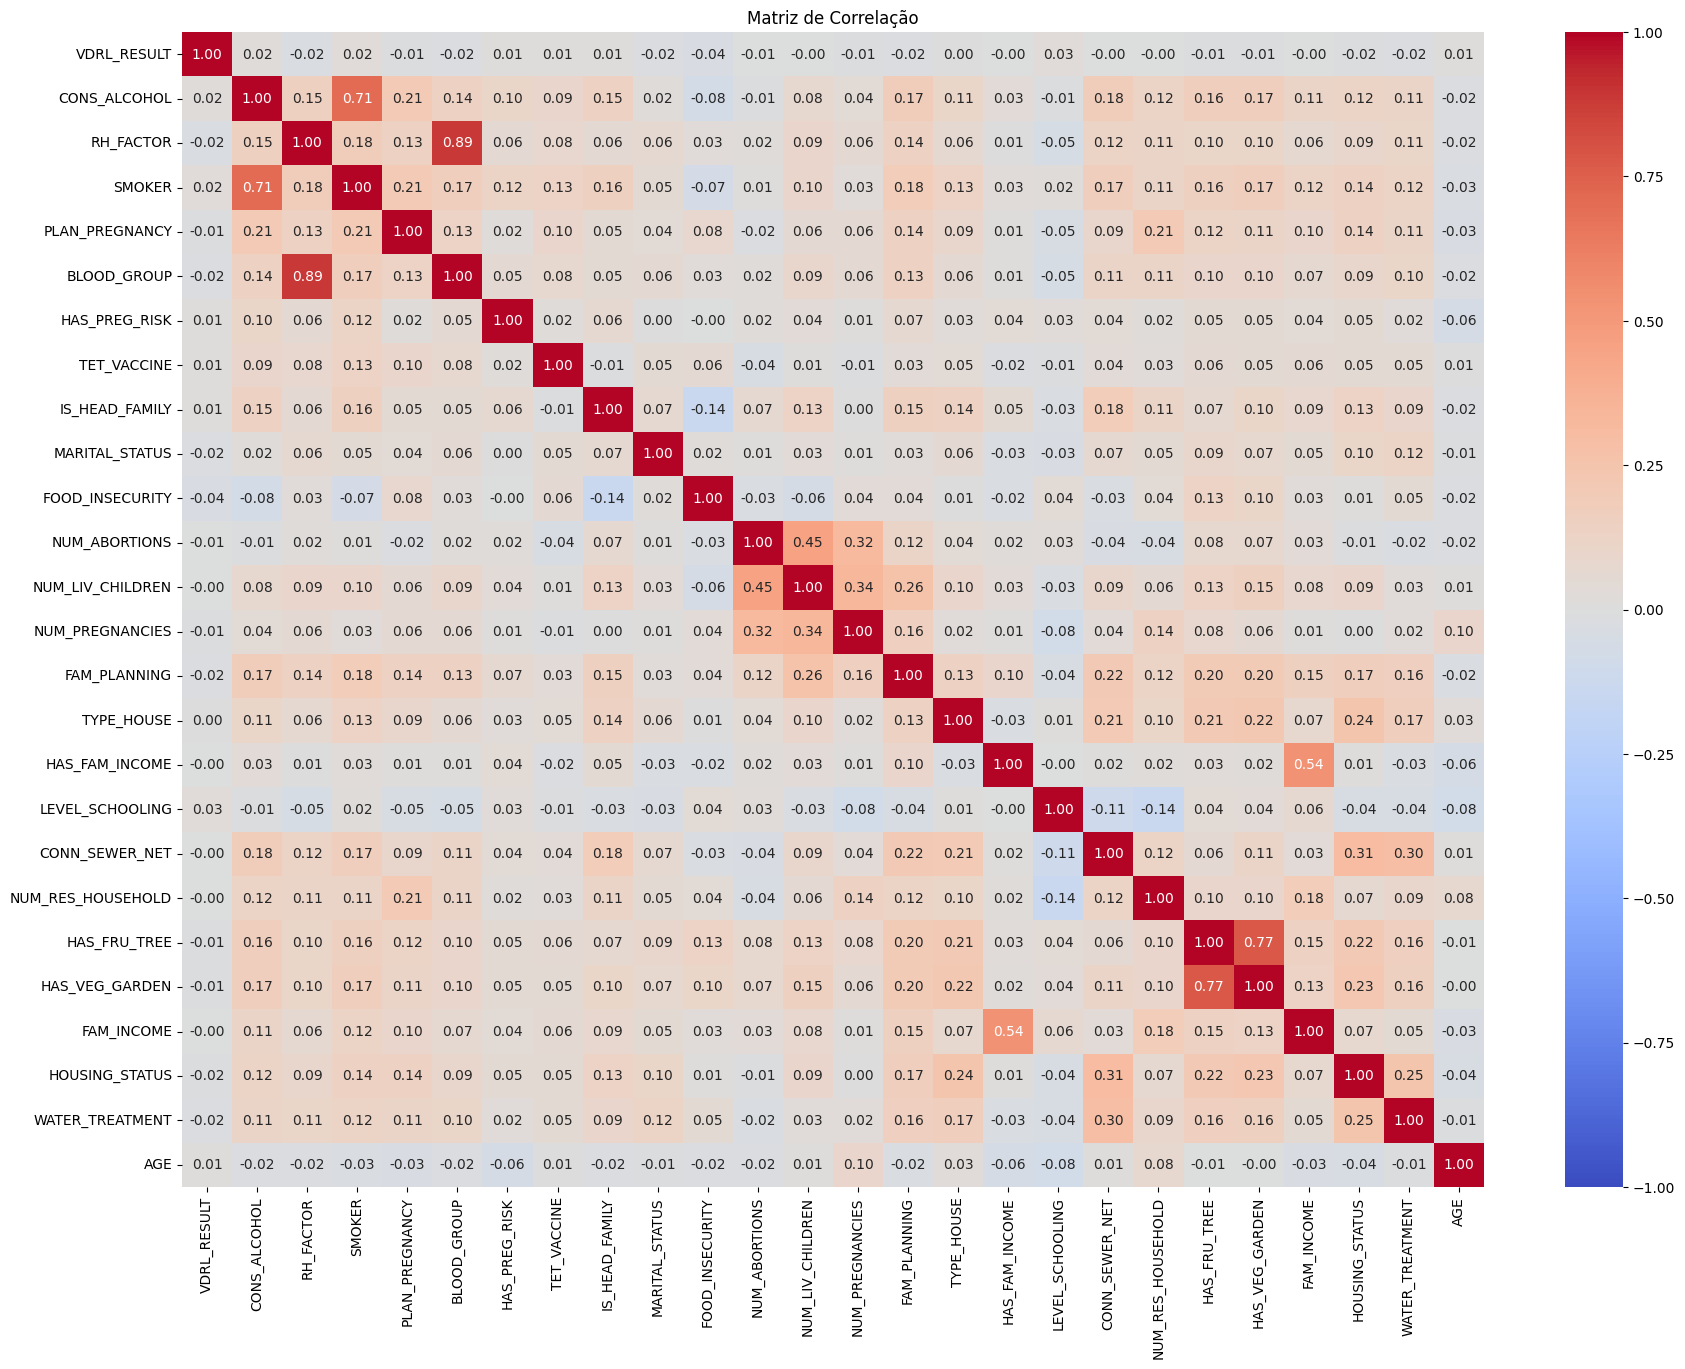

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(21, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmax=1, vmin=-1)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# Análise da distribuição das variáveis
print("\nDistribuição das classes para a variável-alvo VDRL_RESULT:")
print(df['VDRL_RESULT'].value_counts())


Distribuição das classes para a variável-alvo VDRL_RESULT:
VDRL_RESULT
1.0    40936
0.0      826
Name: count, dtype: int64


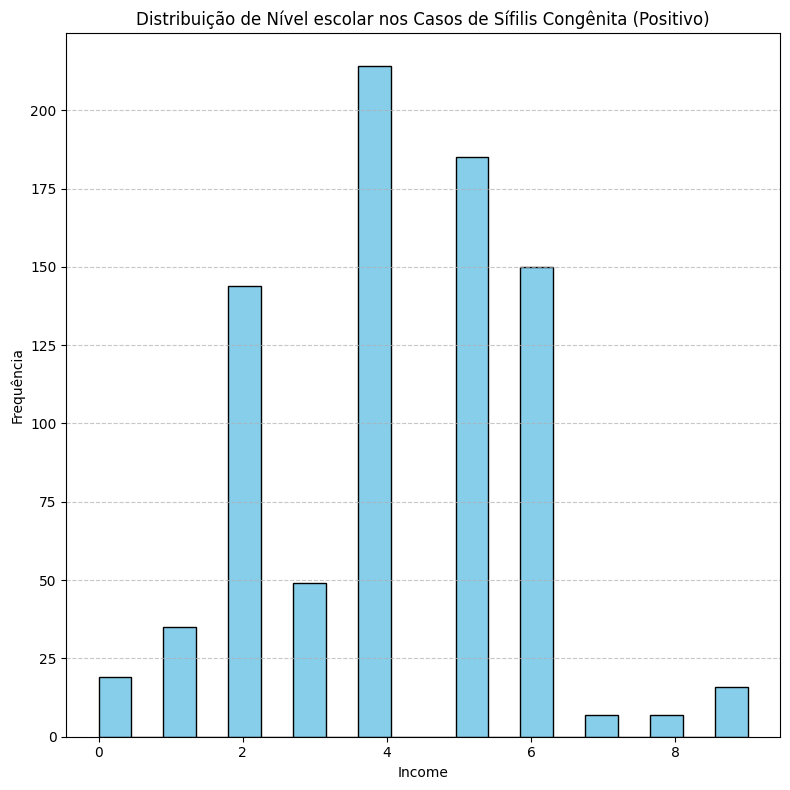

In [ ]:
plt.figure(figsize=(8, 8))
plt.hist(df_positive['LEVEL_SCHOOLING'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Nível escolar nos Casos de Sífilis Congênita (Positivo)')
plt.xlabel('Income')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

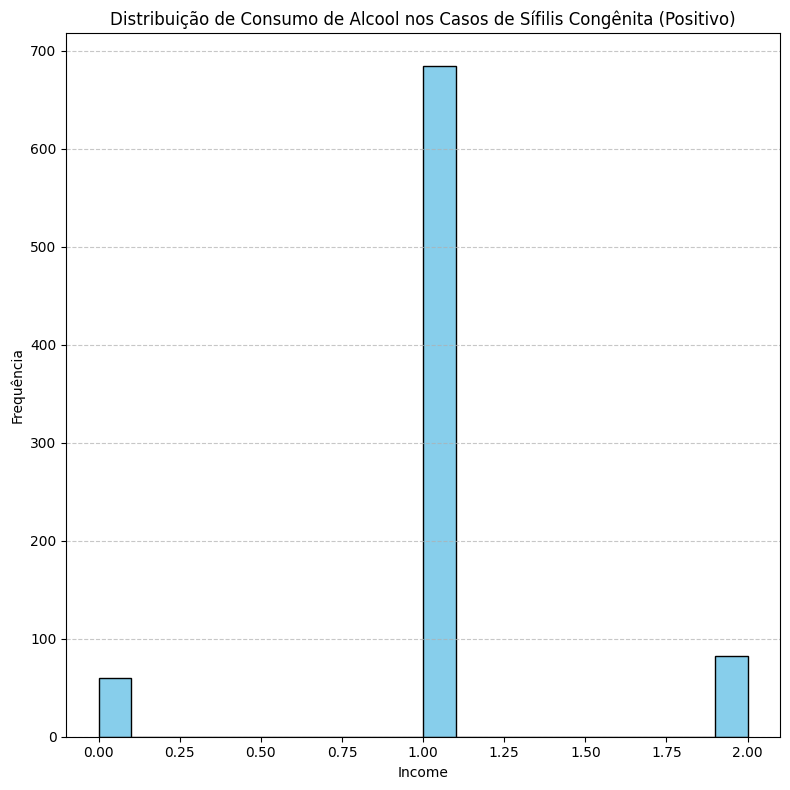

In [ ]:
plt.figure(figsize=(8, 8))
plt.hist(df_positive['CONS_ALCOHOL'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Consumo de Alcool nos Casos de Sífilis Congênita (Positivo)')
plt.xlabel('Income')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

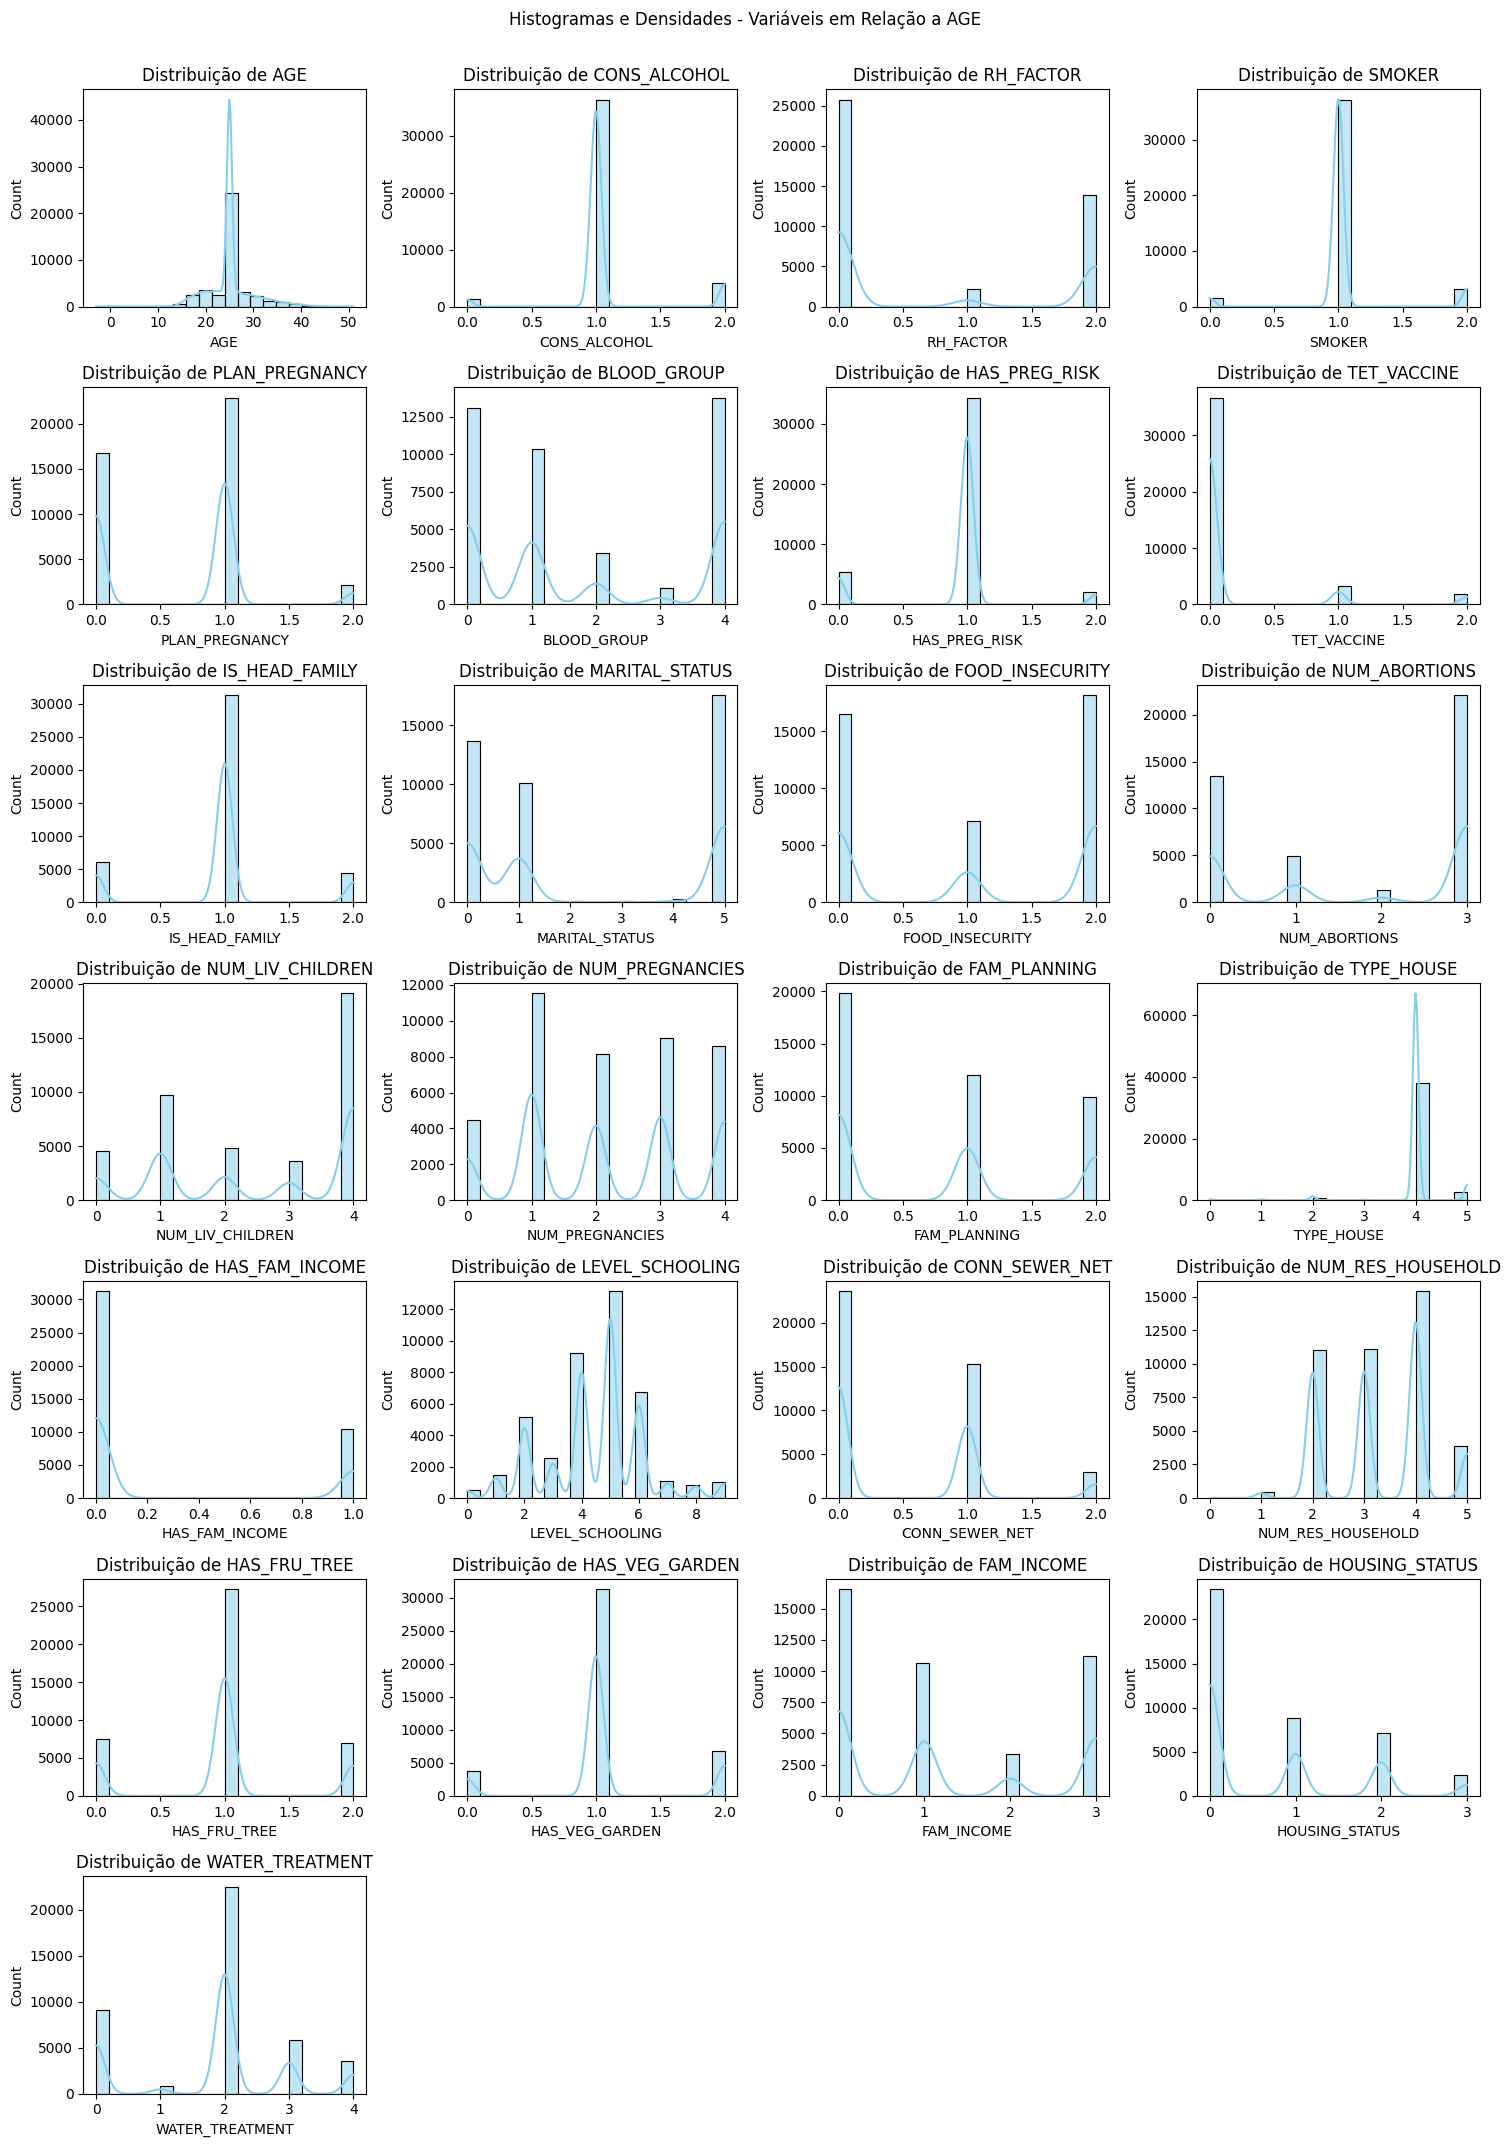

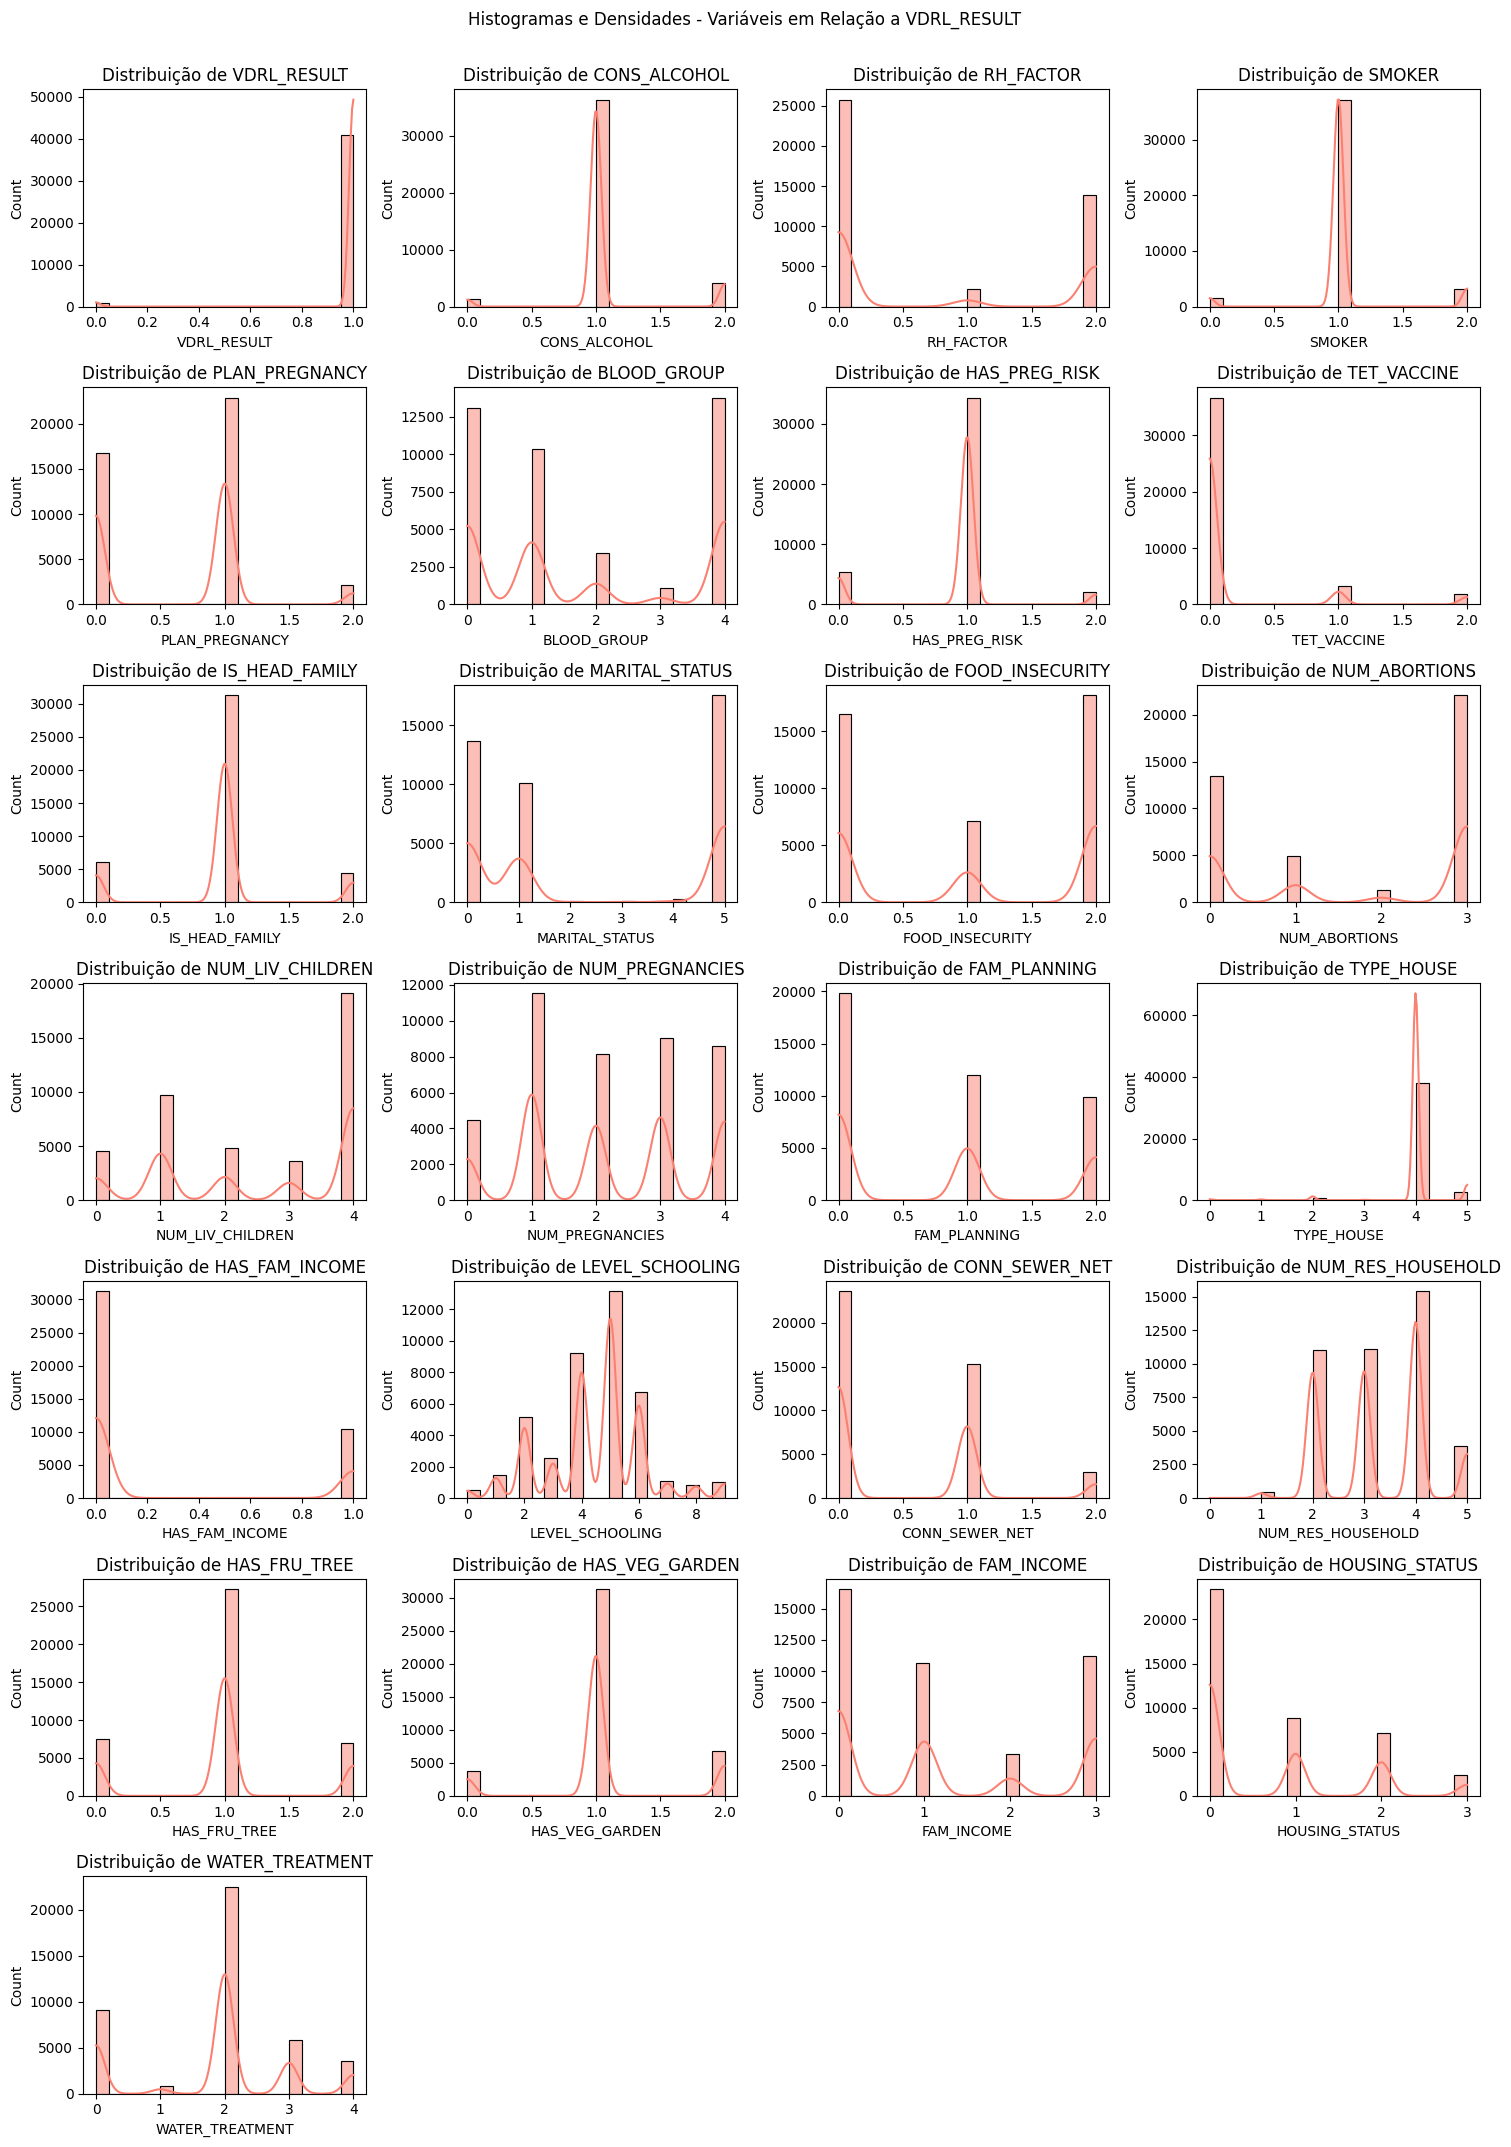

In [ ]:
# Listar variáveis para AGE e VDRL_RESULT
age_related_vars = ['AGE'] + [col for col in df.columns if 'AGE' not in col and col != 'VDRL_RESULT']
vdrl_related_vars = ['VDRL_RESULT'] + [col for col in df.columns if 'VDRL_RESULT' not in col and col != 'AGE']

# Função para plotar variáveis com layout ajustável
def plot_variables(variables, title, color):
    num_vars = len(variables)
    rows = math.ceil(num_vars / 4)  # Determinar o número de linhas para 4 colunas por figura
    plt.figure(figsize=(15, rows * 3))

    for i, var in enumerate(variables, 1):
        plt.subplot(rows, 4, i)
        sns.histplot(df[var], kde=True, bins=20, color=color)
        plt.title(f'Distribuição de {var}')

    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

# Plotar variáveis relacionadas a AGE
plot_variables(age_related_vars, 'Histogramas e Densidades - Variáveis em Relação a AGE', 'skyblue')

# Plotar variáveis relacionadas a VDRL_RESULT
plot_variables(vdrl_related_vars, 'Histogramas e Densidades - Variáveis em Relação a VDRL_RESULT', 'salmon')

In [ ]:
#Checar valores duplicados
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Number of duplicate rows: 833


In [ ]:
X = df.drop('VDRL_RESULT', axis=1)
y = df['VDRL_RESULT']

vdrl_counts = df['VDRL_RESULT'].value_counts()
vdrl_ratio = vdrl_counts.min() / vdrl_counts.max()

if vdrl_ratio < 0.5:  # Desequilíbrio alto
    smote = SMOTEENN(smote=SMOTE(k_neighbors=1))
else:
    smote = SMOTE(k_neighbors=1)

X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['VDRL_RESULT'] = y_resampled

print(df_balanced['VDRL_RESULT'].value_counts())

VDRL_RESULT
0.0    40056
1.0    35849
Name: count, dtype: int64


In [ ]:
 # Define features and target for classification and regression
X_classification = df.drop(['VDRL_RESULT'], axis=1)
y_classification = df['VDRL_RESULT']
X_regression = df.drop(['AGE'], axis=1)
y_regression = df['AGE']

# Split data classificação
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

# Classificação com Decision Tree

In [ ]:
# árvore de decisão com target VDRL e AGE, vulgo DT
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_class, y_train_class)

y_pred_class = clf.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_acc = cross_val_score(clf, X_classification, y_classification, cv=kf, scoring='accuracy').mean()

classification_results = {
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'Cross-Validation Accuracy': cross_val_acc
}

classification_results

{'Accuracy': 0.9531720824171349,
 'Recall': 0.9531720824171349,
 'F1 Score': 0.9560206575240012,
 'Cross-Validation Accuracy': 0.9504019273336587}

# Classificação com XGBoost

In [ ]:
results = []
trees_list_xgb = [50, 100]
learning_rate_list_xgb = [0.01, 0.1]
for n_estimators in trees_list_xgb:
        for learning_rate in learning_rate_list_xgb:
            # Cria o modelo XGBClassifier com os hiperparâmetros especificados
            xgb = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

            # Treina o modelo
            xgb.fit(X_train_class, y_train_class)

            # Faz previsões no conjunto de teste
            y_pred = xgb.predict(X_test_class)

            # Calcula as métricas
            accuracy = accuracy_score(y_test_class, y_pred)
            f1 = f1_score(y_test_class, y_pred, average='weighted')
            recall = recall_score(y_test_class, y_pred, average='weighted')

            # Armazena os resultados
            results.append({
                "model": "XGBClassifier",
                "n_estimators": n_estimators,
                "learning_rate": learning_rate,
                "accuracy": accuracy
            })

            print(f"n_estimators={n_estimators}, learning_rate={learning_rate} | Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Recall: {recall:.4f}")

results

n_estimators=50, learning_rate=0.01 | Accuracy: 0.9786, F1 Score: 0.9680, Recall: 0.9786
n_estimators=50, learning_rate=0.1 | Accuracy: 0.9786, F1 Score: 0.9680, Recall: 0.9786
n_estimators=100, learning_rate=0.01 | Accuracy: 0.9786, F1 Score: 0.9680, Recall: 0.9786
n_estimators=100, learning_rate=0.1 | Accuracy: 0.9787, F1 Score: 0.9682, Recall: 0.9787


[{'model': 'XGBClassifier',
  'n_estimators': 50,
  'learning_rate': 0.01,
  'accuracy': 0.9785813176968808},
 {'model': 'XGBClassifier',
  'n_estimators': 50,
  'learning_rate': 0.1,
  'accuracy': 0.9785813176968808},
 {'model': 'XGBClassifier',
  'n_estimators': 100,
  'learning_rate': 0.01,
  'accuracy': 0.9785813176968808},
 {'model': 'XGBClassifier',
  'n_estimators': 100,
  'learning_rate': 0.1,
  'accuracy': 0.9786627575535467}]

# Classificação com Random Forest

In [ ]:
# Train Random Forest for classification
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_class, y_train_class)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test_class)
accuracy_rf = accuracy_score(y_test_class, y_pred_rf)
recall_rf = recall_score(y_test_class, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_class, y_pred_rf, average='weighted')

# Cross-validation for Random Forest
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_acc_rf = cross_val_score(rf_clf, X_classification, y_classification, cv=kf, scoring='accuracy').mean()

# Show classification results
rf_classification_results = {
    'Accuracy': accuracy_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf,
    'Cross-Validation Accuracy': cross_val_acc_rf
}
rf_classification_results


{'Accuracy': 0.9782555582702175,
 'Recall': 0.9782555582702175,
 'F1 Score': 0.9678250206393259,
 'Cross-Validation Accuracy': 0.9793789238327397}

# Reg com Random Forest e Ridge

                     Model       MAE        MSE      RMSE      MAPE
0         Ridge Regression  2.898221  19.835370  4.453692  0.120274
1  Random Forest Regressor  2.948601  17.179979  4.144874  0.121502


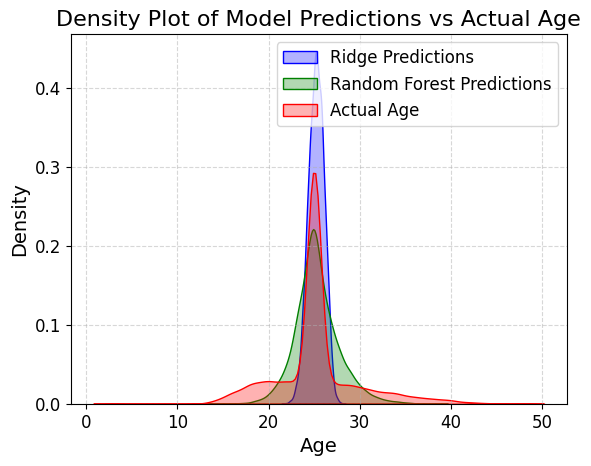

In [ ]:
df_positive_ages = df[df['AGE'] > 0]

X = df_positive_ages.drop(columns=['AGE', 'VDRL_RESULT'])
y = df_positive_ages['AGE']

#Splitting the data again into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Defining Models
ridge_model = Ridge(alpha=1.0)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#Training models
ridge_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

#Predicting and recalculating metrics
ridge_predictions = ridge_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

#Updated evaluation metrics
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = root_mean_squared_error(y_test, ridge_predictions)
ridge_mape = mean_absolute_percentage_error(y_test, ridge_predictions)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = root_mean_squared_error(y_test, rf_predictions)
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)

#Summary of results, includes MSE
map_regressao = {
    "Model": ["Ridge Regression", "Random Forest Regressor"],
    "MAE": [ridge_mae, rf_mae],
    "MSE": [ridge_mse, rf_mse],
    "RMSE": [ridge_rmse, rf_rmse],
    "MAPE": [ridge_mape, rf_mape]
}

map_regressao_df = pd.DataFrame(map_regressao)

print(map_regressao_df)

#Ridge Regression Predictions
sns.kdeplot(ridge_predictions, label="Ridge Predictions", color="blue", fill=True, alpha=0.3, linewidth=1)
#Random Forest Predictions
sns.kdeplot(rf_predictions, label="Random Forest Predictions", color="green", fill=True, alpha=0.3, linewidth=1)
#Actual Values
sns.kdeplot(y_test, label="Actual Age", color="red", fill=True, alpha=0.3, linewidth=1)

#Formatação adicional para maior visibilidade
plt.title("Density Plot of Model Predictions vs Actual Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()